In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#필요한 라이브러리 로드

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

In [ ]:
# 데이터 불러오기

from google.colab import drive

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income/sample_submission.csv')


In [ ]:
train.shape, test.shape

((20000, 23), (10000, 22))

In [ ]:
train.head().T

,0,1,2,3,4
ID,TRAIN_00000,TRAIN_00001,TRAIN_00002,TRAIN_00003,TRAIN_00004
Age,63,37,58,44,37
Gender,M,M,F,M,F
Education_Status,Middle (7-8),Associates degree (Vocational),High graduate,High graduate,High graduate
Employment_Status,Full-Time,Full-Time,Full-Time,Full-Time,Full-Time
Working_Week (Yearly),4,52,52,52,52
Industry_Status,Social Services,Entertainment,Manufacturing (Non-durable),Retail,Retail
Occupation_Status,Services,Services,Admin Support (include Clerical),Technicians & Support,Sales
Race,White,White,Black,White,White
Hispanic_Origin,All other,All other,All other,All other,All other


In [ ]:
test.head().T

,0,1,2,3,4
ID,TEST_0000,TEST_0001,TEST_0002,TEST_0003,TEST_0004
Age,79,47,18,39,6
Gender,M,M,F,F,M
Education_Status,High Junior,Elementary (5-6),High Junior,Associates degree (Vocational),Children
Employment_Status,Children or Armed Forces,Children or Armed Forces,Children or Armed Forces,Full-Time,Children or Armed Forces
Working_Week (Yearly),0,0,52,30,0
Industry_Status,Not in universe or children,Not in universe or children,Retail,Medical (except Hospitals),Not in universe or children
Occupation_Status,Unknown,Unknown,Services,Services,Unknown
Race,White,White,White,White,White
Hispanic_Origin,All other,Other Spanish,All other,All other,Mexican-American


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [ ]:
test.info()

In [ ]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index' : '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳감 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

resumetable(train)

데이터 세트 형상: (20000, 23)


,피처,데이터 타입,결측값 개수,고윳감 개수,첫 번째 값,두 번째 값,세 번째 값
0,ID,object,0,20000,TRAIN_00000,TRAIN_00001,TRAIN_00002
1,Age,int64,0,91,63,37,58
2,Gender,object,0,2,M,M,F
3,Education_Status,object,0,17,Middle (7-8),Associates degree (Vocational),High graduate
4,Employment_Status,object,0,8,Full-Time,Full-Time,Full-Time
5,Working_Week (Yearly),int64,0,53,4,52,52
6,Industry_Status,object,0,24,Social Services,Entertainment,Manufacturing (Non-durable)
7,Occupation_Status,object,0,15,Services,Services,Admin Support (include Clerical)
8,Race,object,0,5,White,White,Black
9,Hispanic_Origin,object,0,10,All other,All other,All other


In [ ]:
print('Education_Status 고윳값:', train['Education_Status'].unique())

Education_Status 고윳값: ['Middle (7-8)' 'Associates degree (Vocational)' 'High graduate'
 'Masters degree' 'Bachelors degree' 'High Freshman' 'Elementary (1-4)'
 'College' 'Children' 'High Sophomore' 'Associates degree (Academic)'
 'High Junior' 'Elementary (5-6)' 'Doctorate degree' 'Professional degree'
 'High Senior' 'Kindergarten']


In [ ]:
print('Employment_Status 고윳값:', train['Employment_Status'].unique())
print('Working_Week (Yearly) 고윳값:', train['Working_Week (Yearly)'].unique())

Employment_Status 고윳값: ['Full-Time' 'Children or Armed Forces' 'Not Working' 'Seeking Full-Time'
 'Choice Part-Time' 'Part-Time (Usually Part-Time)'
 'Part-Time (Usually Full-Time)' 'Seeking Part-Time']
Working_Week (Yearly) 고윳값: [ 4 52 50  0  5 30 40 20 14  6 12 48 26 44 42 46 36 49 45 28 35  2  8 24
 15 25 16 38 22 23 43 32 17 51 37 13 11 47 21  1 29 10 18 39  7 34 41  9
 27  3 19 33 31]


In [ ]:
print('Industry_Status 고윳값:', train['Industry_Status'].unique())
print('Occupation_Status 고윳값:', train['Occupation_Status'].unique())

Industry_Status 고윳값: ['Social Services' 'Entertainment' 'Manufacturing (Non-durable)' 'Retail'
 'Not in universe or children' 'Construction' 'Hospitals'
 'Manufacturing (Durable)' 'Public Administration' 'Education'
 'Finance Insurance & Real Estate' 'Transportation'
 'Medical (except Hospitals)' 'Wholesale' 'Other professional services'
 'Personal Services (except Private Household)' 'Business & Repair'
 'Private Household Services' 'Mining' 'Agriculture'
 'Utilities & Sanitary' 'Communications' 'Forestry & Fisheries'
 'Armed Forces']
Occupation_Status 고윳값: ['Services' 'Admin Support (include Clerical)' 'Technicians & Support'
 'Sales' 'Unknown' 'Machine Operators & Inspectors' 'Craft & Repair'
 'Protective Services' 'Management' 'Professional' 'Transportation'
 'Handlers/Cleaners' 'Private Household Services'
 'Farming & Forestry & Fishing' 'Armed Forces']


In [ ]:
print('Race 고윳값:', train['Race'].unique())
print('Hispanic_Origin 고윳값:', train['Hispanic_Origin'].unique())
print('Martial_Status 고윳값:', train['Martial_Status'].unique())

Race 고윳값: ['White' 'Black' 'Native American/Aleut/Eskimo' 'Asian/Pacific' 'Other']
Hispanic_Origin 고윳값: [' All other' ' Cuban' ' Mexican (Mexicano)' ' Central or South American'
 ' Puerto Rican' ' Mexican-American' ' Other Spanish' ' Do not know'
 ' Chicano' ' NA']
Martial_Status 고윳값: ['Married' 'Separated' 'Divorced' 'Widowed' 'Single'
 'Married (Spouse Absent)' 'Married (Armed Force Spouse)']


In [ ]:
print('Household_Status 고윳값:', train['Household_Status'].unique())
print('Household_Summary 고윳값:', train['Household_Summary'].unique())

Household_Status 고윳값: ['Householder' 'Nonfamily householder'
 'Child 18+ never marr Not in a subfamily' 'Spouse of householder'
 'Other Relative 18+ ever married Responsible Person of subfamily'
 'Child <18 never marr not in subfamily'
 'Other Relative <18 never married child of subfamily Responsible Person'
 'Child 18+ ever married Responsible Person of subfamily'
 'Secondary individual' 'Grandchild 18+ never marr not in subfamily'
 'Other Rel 18+ ever marr not in subfamily'
 'Responsible Person of unrelated subfamily'
 'Grandchild <18 never married child of subfamily Responsible Person'
 'Child 18+ ever marr Not in a subfamily'
 'Other Rel 18+ never marr not in subfamily'
 'Child 18+ never married Responsible Person of subfamily'
 'Other Rel <18 never marr not in subfamily'
 'Child under 18 of Responsible Person of unrelated subfamily'
 'Grandchild <18 never marr not in subfamily' 'In group quarters'
 'Other Relative 18+ spouse of subfamily Responsible Person'
 'Other Relative 18+ ne

In [ ]:
print('Citizenship 고윳값:', train['Citizenship'].unique())
print('Birth_Country 고윳값:', train['Birth_Country'].unique())
print('Birth_Country (Father) 고윳값:', train['Birth_Country (Father)'].unique())
print('Birth_Country (Mother) 고윳값:', train['Birth_Country (Mother)'].unique())

Citizenship 고윳값: ['Native' 'Foreign-born (Non-US Citizen)'
 'Native (Born in Puerto Rico or US Outlying)'
 'Foreign-born (Naturalized US Citizen)' 'Native (Born Abroad)']
Birth_Country 고윳값: ['US' 'Cuba' 'Portugal' 'Mexico' 'Puerto-Rico' 'Germany' 'Japan'
 'Columbia' 'Philippines' 'Unknown' 'Italy' 'Trinadad&Tobago'
 'South Korea' 'Iran' 'England' 'India' 'Vietnam' 'France' 'Scotland'
 'Ecuador' 'China' 'Outlying-U S (Guam USVI etc)' 'Nicaragua' 'Peru'
 'Canada' 'Jamaica' 'Dominican-Republic' 'Poland' 'Hong Kong' 'Thailand'
 'Cambodia' 'Guatemala' 'Laos' 'Yugoslavia' 'Haiti' 'Ireland'
 'El-Salvador' 'Panama' 'Honduras' 'Greece' 'Hungary' 'Taiwan'
 'Holand-Netherlands']
Birth_Country (Father) 고윳값: ['US' 'Cuba' 'Portugal' 'Mexico' 'Unknown' 'Puerto-Rico' 'Germany' 'Japan'
 'Poland' 'Columbia' 'Philippines' 'Italy' 'Trinadad&Tobago' 'England'
 'South Korea' 'Iran' 'France' 'India' 'China' 'Dominican-Republic'
 'Scotland' 'Ecuador' 'Nicaragua' 'Peru' 'Cambodia' 'Canada' 'Jamaica'
 'Vietnam'

In [ ]:
print('Tax_Status 고윳값:', train['Tax_Status'].unique())
print('Gains 고윳값:', train['Gains'].unique())
print('Losses 고윳값:', train['Losses'].unique())
print('Dividends 고윳값:', train['Dividends'].unique())
print('Income_Status 고윳값:', train['Income_Status'].unique())

Tax_Status 고윳값: ['Nonfiler' 'Single' 'Married Filling Jointly both under 65 (MFJ)'
 'Head of Household (HOH)'
 'Married Filling Jointly one over 65 & one under 65 (MFJ)'
 'Married Filling Jointly both over 65 (MFJ)']
Gains 고윳값: [    0  3411  7298  5178 99999 15024  7688  3464  1848  5556  2174  4865
  3137  6849  7443 10566  9386  1086  1471  2176  2829  4386 10520  3908
 14344  8614  4101  3471  1055  1409 13550  1831  2964  4416  4650 27828
  3103   594  1506   991  5013   114  4787  3325  3674   914 14084  7896
  4064  2062 20051  2354  3273  2580  2463  2597 25124  3887  2050  6723
  4508  2407  2329  1424  2009 15831  3781  2993  2907  3418  3942  6418
  4687  2202  2885  3818  2635  6497  2414 11678  2228  2977  2653  7430
  3456  1455  2290  4931   401  6767  1797  2105  5060  3432  1173  5455
 10605  9562  2936  6360  5721  2961 18481  6514  2227  1151]
Losses 고윳값: [   0 2001 1876 2057 1573 2042 1429 1887 1911 1602 1590 1977 2201 2129
 2246  323 2231 1741 2704 2352 2467 2415 23

In [ ]:
# 수치 데이터를 기준으로 상관관계를 분석
#  ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income'] 필터링 후 데이터 프레임의 corr() 함수를 이용하여 확인
cont_features = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']
train[cont_features].corr()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
Age,1.000000,0.206218,0.044156,0.053384,0.107565,0.124795
Working_Week (Yearly),0.206218,1.000000,0.053362,0.056658,0.002209,0.419628
Gains,0.044156,0.053362,1.000000,-0.013313,0.081115,0.009555
Losses,0.053384,0.056658,-0.013313,1.000000,0.015351,0.036502
Dividends,0.107565,0.002209,0.081115,0.015351,1.000000,0.002449
Income,0.124795,0.419628,0.009555,0.036502,0.002449,1.000000


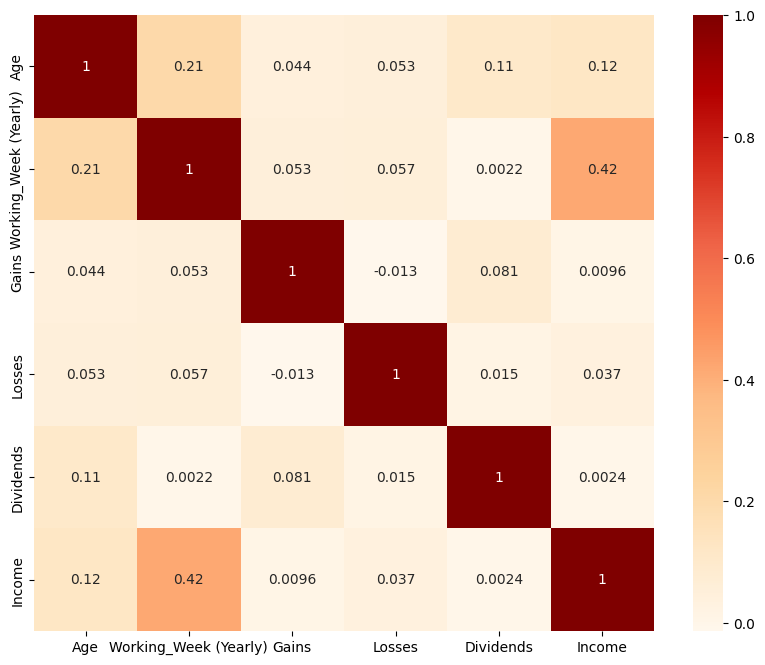

In [ ]:
plt.figure(figsize = (10, 8))
cont_corr = train[cont_features].corr()
sns.heatmap(cont_corr, annot = True, cmap = 'OrRd');

- 수치형 데이터 중 Working_Week (Yearly)를 제외하고는 income과 연관성이 크지 않음
- Working_Week (Yearly)를 제외한 나머지 피쳐는 삭제

In [ ]:
# 훈련데이터와 테스트 데이터를 합친 후 피쳐 삭제
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop(['ID', 'Age', 'Gains', 'Losses', 'Dividends', 'Household_Status'], axis=1)

In [ ]:
# 분류형 카테고리 컬럼들을 범주형으로 변환
categorical_columns = ['Gender', 'Education_Status', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']
all_data[categorical_columns] = all_data[categorical_columns].astype('category')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 카테고리 컬럼들을 원핫인코딩하여 새로운 배열 생성
encoded_features = encoder.fit_transform(all_data[categorical_columns])

# OneHotEncoder 결과를 데이터프레임으로 변환하고 컬럼 이름을 지정
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)
encoded_all_data = pd.DataFrame(encoded_features.toarray(), columns=feature_names)

# 원핫인코딩 결과를 원래 데이터프레임과 합치기
all_data = pd.concat([all_data, encoded_all_data], axis=1)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 256 entries, Gender to Income_Status_Unknown
dtypes: category(15), float64(240), int64(1)
memory usage: 55.6 MB


In [ ]:
all_data.head()

,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Summary,...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Householder,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Householder,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# 기존 분류형 카데코리 피처 삭제
all_data = all_data.drop(['Gender', 'Education_Status', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status'], axis=1)

In [ ]:
all_data.head().T

,0,1,2,3,4
Working_Week (Yearly),4.0,52.0,52.0,52.0,52.0
Income,425.0,0.0,860.0,850.0,570.0
Gender_F,0.0,0.0,1.0,0.0,1.0
Gender_M,1.0,1.0,0.0,1.0,0.0
Education_Status_Associates degree (Academic),0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
Tax_Status_Nonfiler,1.0,0.0,0.0,0.0,0.0
Tax_Status_Single,0.0,1.0,0.0,1.0,0.0
Income_Status_Over Median,0.0,0.0,0.0,0.0,0.0
Income_Status_Under Median,0.0,1.0,1.0,1.0,0.0


In [ ]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[:num_train].drop('Income', axis=1)
X_test = all_data[num_train:].drop('Income', axis=1)

In [ ]:
X_train.shape, X_test.shape

((20000, 240), (10000, 240))

In [ ]:
X_train.head()

,Working_Week (Yearly),Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,Education_Status_Children,Education_Status_College,Education_Status_Doctorate degree,Education_Status_Elementary (1-4),...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,52,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test.head()

,Working_Week (Yearly),Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,Education_Status_Children,Education_Status_College,Education_Status_Doctorate degree,Education_Status_Elementary (1-4),...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
20000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
20001,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20002,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
20003,30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
20004,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
label_name = "Income"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(20000,)


0    425
1      0
2    860
3    850
4    570
Name: Income, dtype: int64

In [ ]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

In [ ]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 7min 4s, sys: 1.67 s, total: 7min 6s
Wall time: 4min 12s
Score= 2.88180


In [ ]:
# 학습시킴
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [ ]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(10000,)


array([  0.        ,   0.        , 417.77154762, 643.83      ,
         0.        , 610.08      , 413.59769841,   0.        ,
         0.        , 927.86555556])

<ipython-input-36-d8d5b1cb40b1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,ax=ax1,bins=50)
<ipython-input-36-d8d5b1cb40b1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions,ax=ax2,bins=50)


[Text(0.5, 1.0, 'test')]

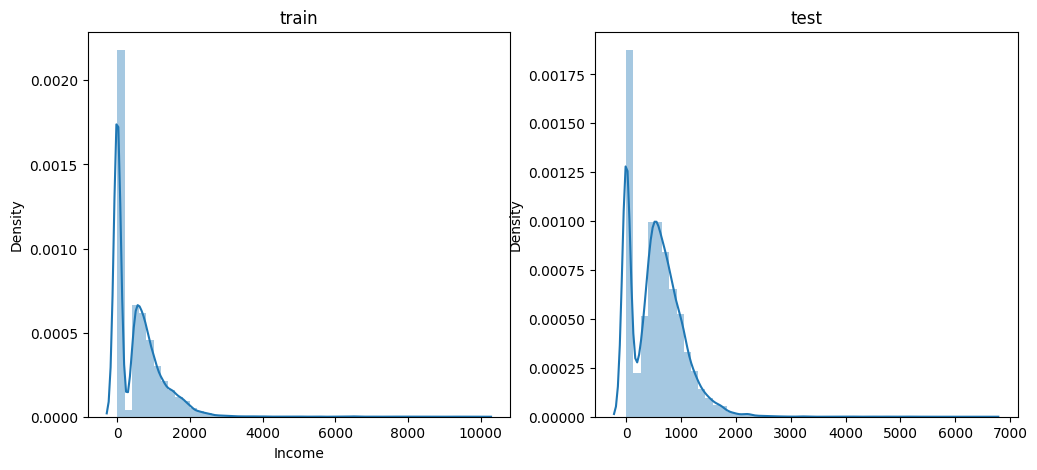

In [ ]:
# 예측한 데이터를 시각화 해본다.
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [ ]:
submission["Income"] = predictions

print(submission.shape)
submission.head()

(10000, 2)


,ID,Income
0,TEST_0000,0.000000
1,TEST_0001,0.000000
2,TEST_0002,417.771548
3,TEST_0003,643.830000
4,TEST_0004,0.000000


In [ ]:
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/income/income prediction_submit01", index=False)